In [1]:
import numpy as np

actions = [ 'WORD1501', 'WORD1502', 'WORD1503', 'WORD1504', 'WORD1505', 'WORD1506', 'WORD1507', 'WORD1508', 'WORD1509', 'WORD1510' ]

data = np.concatenate([
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1501_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1502_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1503_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1504_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1505_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1506_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1507_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1508_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1509_1674012947.npy'),
    np.load('D:/JiSongYoung/JiSongYoung/kt/many/seq_WORD1510_1674012947.npy')
])

data.shape

(14399, 42, 100)

In [2]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(14399, 42, 99)
(14399,)


In [3]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(14399, 10)

In [4]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(12959, 42, 99) (12959, 10)
(1440, 42, 99) (1440, 10)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]), # node 개수 64개
    Dense(32, activation='relu'), # node 개수 32개
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # loss='categorical_crossentropy -> 3개의 action 중 어떤 건지 모델에게 추론하게 함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 44,394
Trainable params: 44,394
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/sample_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

model.save('sample_model.h5')

Epoch 1/200
402/405 [============================>.] - ETA: 0s - loss: 367.5110 - acc: 0.1123
Epoch 1: val_acc improved from -inf to 0.16458, saving model to models\sample_model.h5
405/405 [==============================] - 10s 17ms/step - loss: 366.7834 - acc: 0.1125 - val_loss: 281.9248 - val_acc: 0.1646 - lr: 0.0010
Epoch 2/200
402/405 [============================>.] - ETA: 0s - loss: 74.1542 - acc: 0.1147
Epoch 2: val_acc did not improve from 0.16458
405/405 [==============================] - 6s 15ms/step - loss: 74.0034 - acc: 0.1151 - val_loss: 49.1566 - val_acc: 0.1312 - lr: 0.0010
Epoch 3/200
403/405 [============================>.] - ETA: 0s - loss: 42.4552 - acc: 0.1229
Epoch 3: val_acc did not improve from 0.16458
405/405 [==============================] - 6s 15ms/step - loss: 42.5925 - acc: 0.1230 - val_loss: 64.4191 - val_acc: 0.1410 - lr: 0.0010
Epoch 4/200
404/405 [============================>.] - ETA: 0s - loss: 35.5121 - acc: 0.1358
Epoch 4: val_acc did not improve f

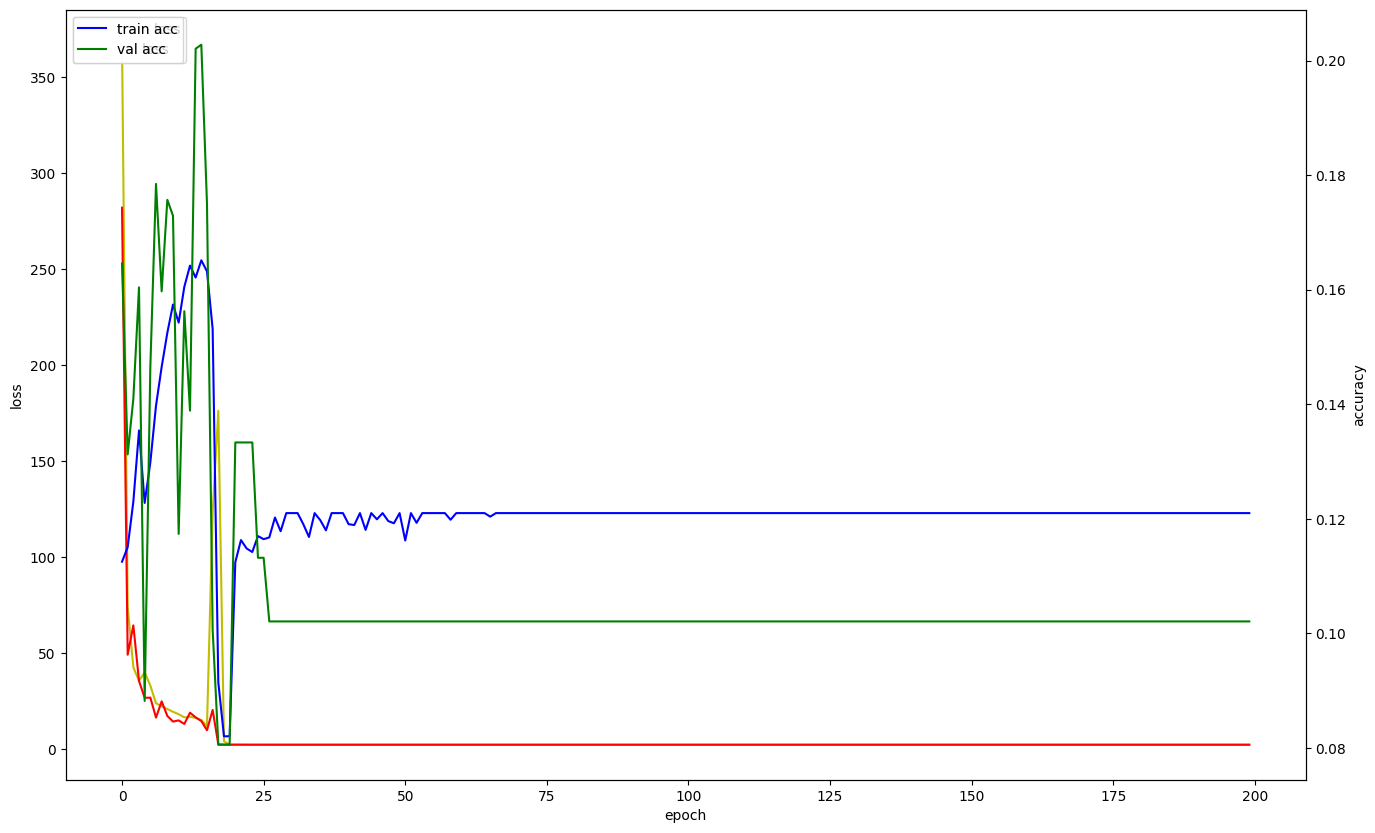

In [7]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()